# The data has been stored in an excel spread sheet. Import the xlrd package to handle reading data from the excel sheet into arrays. Note: the data here is yet identified just as a cell entry and will be later converted into its actual value i.e either string or integer.

# The output generated by the cell below is a verification for successful import. The titles of various columns are displayed as the output

In [1]:
#import stuff
import xlrd

book      =   xlrd.open_workbook('DataSetToExportToCollboratorsMay22_2019.xlsx')
dat_book  =   xlrd.open_workbook('CancerAKAForJoy.xlsx')
sheet     =   book.sheet_by_index(0)
sheet0    =   dat_book.sheet_by_index(0)
sheet1    =   dat_book.sheet_by_index(1)
sheet2    =   dat_book.sheet_by_index(2)

#print some thing to check if import is correct
sheet.row_values(0,end_colx=10,start_colx=0)

['pubmed_id',
 'title',
 'abstract_text',
 'ambiguous_penetrance',
 'ambiguous_incidence',
 'penetrance',
 'incidence',
 'polymorphism',
 'Germline',
 'Somatic']

# Imported numpy

In [2]:
#just imported it as it's always useful
import numpy as np

# The portion commented is the download shell for stopwords provided by the nltk library. Import nltk first, remove the comment, run the download shell. Enter 'd' to enter download repository and enter 'stopwords' identifier



In [1]:
#commented below is the download interface, which I used to download the stopwords database in nltk package

import nltk
#nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords
        Parikh\AppData\Roaming\nltk_data...
      Unzipping corpora\stopwords.zip.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


# From the entire excel sheet which was read, colums are read into different arrays by using the slicing functionality. The main data is read in the upper paragraph and the tokenisation data is read in the lower paragraph.

# The output generated from the cell below is a verification for successful slicing, the number of entries in the excel sheet can be verified with the length of array.

# The entries are still identified by the code as 'cells', they will be converted to their respective values next.



In [4]:
#slice out vlaues needed, they are still cells and not strings
title         =   sheet.col_slice(colx=1,end_rowx=6579,start_rowx=1)
abstract      =   sheet.col_slice(colx=2,end_rowx=6579,start_rowx=1)
am_penetrance =   sheet.col_slice(colx=3,end_rowx=6579,start_rowx=1)
am_incidence  =   sheet.col_slice(colx=4,end_rowx=6579,start_rowx=1)
penetrance    =   sheet.col_slice(colx=5,end_rowx=6579,start_rowx=1)
incidence     =   sheet.col_slice(colx=6,end_rowx=6579,start_rowx=1)
polymorphism  =   sheet.col_slice(colx=7,end_rowx=6579,start_rowx=1)
germline      =   sheet.col_slice(colx=8,end_rowx=6579,start_rowx=1)
somatic       =   sheet.col_slice(colx=9,end_rowx=6579,start_rowx=1)



#getting data for tokenisation
cancer_tokens   =   sheet0.col_slice(colx=0,end_rowx=750,start_rowx=1)
gene_tokens     =   sheet1.col_slice(colx=0,end_rowx=830,start_rowx=1)
syndrome_tokens =   sheet2.col_slice(colx=0,end_rowx=580,start_rowx=1)

len(title)

6578

# Each entry is is accessed and converted to it's respective value i.e the tile and abstracts are converted to strings and the classes have integer entries.

# The tokens are also converted to strings. They are converted to lowercase as well. The title and abstract will also be converted to lowercase, which makes comparison of strings easier.

# There is a string reversal performed, the purpose of this is to avoid missing out on larger similar strings. As the strings are traversed in a linear fashion for replacing them with tokens.

# For example : The string 'Carney Complex' occurs before 'Carney Complex, Type 1' and hence instead of replacing 'Carney Complex, Type 1' with 'syndrome' it changes the string to 'syndrome, Type 1'. Reversing the order so that the largest string is compared first is the simplest manner to avoid this from happening.


In [5]:
#convert to their respective values i.e strings and integers
for n in np.arange(len(title)):
    title[n]           =   title[n].value
    abstract[n]        =   abstract[n].value
    am_penetrance[n]   =   am_penetrance[n].value
    penetrance[n]      =   penetrance[n].value
    am_incidence[n]    =   am_incidence[n].value
    incidence[n]       =   incidence[n].value
    polymorphism[n]    =   polymorphism[n].value
    germline[n]        =   germline[n].value
    somatic[n]         =   somatic[n].value
    
for n in np.arange(len(cancer_tokens)):
    cancer_tokens[n]   =   cancer_tokens[n].value
    (cancer_tokens[n]).lower()
    
for n in np.arange(len(gene_tokens)):
    gene_tokens[n]     =   gene_tokens[n].value
    gene_tokens[n].lower()
    
for n in np.arange(len(syndrome_tokens)):
    syndrome_tokens[n] =   syndrome_tokens[n].value
    syndrome_tokens[n].lower()
    
#reversed the arrays as the largest string is to be replaced first
cancer_tokens          =   cancer_tokens[::-1]
gene_tokens            =   gene_tokens[::-1]
syndrome_tokens        =   syndrome_tokens[::-1]

# The titles and abstracts are joined as a single string

In [6]:
#combining title and abstracts
for n in np.arange(len(title)):
    title[n]=title[n]+' '+abstract[n]

# The data pre-processing function is declared below which is used as an analyser for the vectoriser.

# The following functionalities are implemented in the function, each of which can be commented out paragraph-wise :

# 1. Punctuations are removed
# 2. Tokenisation is performed, strings matched with the ones present in the ** tokens array are replaced by ** tokens.   ** - syndrome,gene,cancer
# 3. Consecutive, repetitive entries are removed.
# 4. Stopwords are removed. The entries in the earlier downloaded stopwords dataset are matched and removed.
# 5. Stemming (reduction of the word to it's root word) is performed

In [7]:
#function for preproc
#Comment out the pre processing which is not required

import re
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

port = PorterStemmer()
lanc = LancasterStemmer()

def text_proc(mess):
    
    # 1. removed punctuation
    nopunc    =    [c for c in mess if c not in string.punctuation]
    nopunc    =    ''.join(nopunc)
    nopunc    =    nopunc.lower()
    
    
    # 2. tokenisation
    for n in np.arange(len(cancer_tokens)):
        nopunc   =   nopunc.replace(cancer_tokens[n],"cancer")
        
    for n in np.arange(len(gene_tokens)):
        nopunc   =   nopunc.replace(gene_tokens[n],"gene")
        
    for n in np.arange(len(syndrome_tokens)):
        nopunc   =   nopunc.replace(syndrome_tokens[n],"gene")
        
        
    # 3. remove consecutive entries
    nopunc = re.sub(r'\b(.+)(\s+\1\b)+',r'\1',nopunc)
    
    
    # 4. removing stopwords
    nopunc = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    
    
    # 5. stemming
    for ind in np.arange(len(nopunc)):
        nopunc[ind] = port.stem(nopunc[ind])
    return nopunc 

# Standard function for learning curve generation. Mentioned in the documentation for sklearn. Takes as input the classifier, Input vectors and output labels.

In [8]:
#function for learning curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv =None, n_jobs=None, train_sizes=np.linspace(.1,1.0,5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X,y,cv=cv, n_jobs=n_jobs, train_sizes = train_sizes)
    train_scores_mean = np.mean(train_scores,axis=1)
    train_scores_std = np.std(train_scores,axis=1)
    test_scores_mean = np.mean(test_scores,axis=1)
    test_scores_std = np.std(test_scores,axis=1)
    
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean-train_scores_std,train_scores_mean+train_scores_std,alpha=0.1,color='r')
    plt.fill_between(train_sizes, test_scores_mean-test_scores_std,test_scores_mean+test_scores_std,alpha=0.1,color='g')
    plt.plot(train_sizes, train_scores_mean, 'o-',color='r',label="Training Score")
    plt.plot(train_sizes, test_scores_mean, 'o-',color='g',label="CV Score")
    
    plt.legend(loc="best")
    return plt

# The following tasks are to performed on the dataset provided. 

# 1. From the arrays corresponding to columns, entries which have a '1' in ambiguous_penetrance or ambiguous_incidences are to be removed. The remaining entries are to be used as dataset to classify into somatic and to classify into germline

# 2. The germline entries from dataset in (1) are kept, which are used to classify into polymorphism.

# 3. The non-polymorphism entries from dataset in (2) are kept, which are used to classify into penetrance and into incidence.

# Following is implementation where entries with ambiguous_penetrance or ambiguous_incidence = 1 are removed. title1, label1, label2 are the remaining dataset corresponding to title, somatic and germline.

# The output of the cell is to verify deletion of entries. Length of title1 is lesser than that of title.

In [9]:
######### Implementation 1

indicesp     =     [i for i in np.arange(len(am_penetrance)) if am_penetrance[i]==1]
indicesi     =     [i for i in np.arange(len(am_incidence)) if am_incidence[i]==1]
indices      =     np.union1d(indicesp,indicesi)
title1       =     np.delete(title,indices)
label1       =     np.delete(somatic,indices)
label2       =     np.delete(germline,indices)

#checking length to see if deletion works
len(title1)

6342

# The following cell is an extra verification which prints the number of entries which were to be removed. len(title) = len(title1) + len(indices)

In [10]:
#number of entries deleted
len(indices)

236

# All useful stuff for classification from the sklearn library is imported here.

In [2]:
#getting everything I need for classification
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from skmultilearn.model_selection import iterative_train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BaseDiscreteNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import BaseNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.adapt import MLkNN

# The following is where classifier is built. 
# 1. As the best possible parameter from a user provided range has to be selected, the gridsearchcv functionality is used which executes multiple training folds with different parameter combinations and generates the best_estimator
# 2. A pipeline is built which performs the essential tasks in an order. The CountVectorizer uses our custom text_proc function to generate a bag-of-words from the string fed to it and vectorising them. The tfidfTransformer generates vectors based on the terms frequence and inverse-document-frequency. Classifier is directed to the grid as we are searching for best parameters

# For using a new classifier:
# 1. MultinomialNB
#             Replace

param_gd1 = {'alpha':[]}  (filling the parameter values in the square brackets)

#             Replace 

grid1 = GridSearchCV(MultinomialNB(),param_gd1,verbose=3)

# 2. BernoulliNB
#             Replace 

param_gd1 = {'alpha':[]}  (filling the parameter values in the square brackets)

#             Replace 

grid1 = GridSearchCV(BernoulliNB(),param_gd1,verbose=3)

# 3. RandomForest
#             Replace 

param_gd1 = {'n_estimators':[3,10,30], 'max_features':[2,4,6,8]}  (filling the parameter values in the square brackets)

#             Replace 

grid1 = GridSearchCV(RandomForestClassifier(),param_gd1,verbose=3)

# 4. Logistic Regression
#             Replace 

param_gd1 = {'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}  (filling the parameter values in the square brackets)

#             Replace 

grid1 = GridSearchCV(LogisticRegression(),param_gd1,verbose=3)

In [19]:

param_gd1     =     {'C':[1,10,100],'gamma':[0.1,1,0.01]} 
param_gd2     =     {'C':[1,10,100],'gamma':[0.1,1,0.01]} 
grid1         =     GridSearchCV(SVC(),param_gd1,verbose=3)
grid2         =     GridSearchCV(SVC(),param_gd2,verbose=3)

#one pipeline for somatic classification
pipeline_s = Pipeline([
    ('bow',CountVectorizer(analyzer=text_proc)),
    ('tfidf',TfidfTransformer()),
    ('classifier',grid1)
])


#one pipeline for germline classification
pipeline_g = Pipeline([
    ('bow',CountVectorizer(analyzer=text_proc)),
    ('tfidf',TfidfTransformer()),
    ('classifier',grid2)
])

# Splitting dataset into training and testing dataset(10% testing size) using train_test split to keep it random

In [20]:
#generating training and testing data
title_tr_s,  title_te_s,  label_tr_s,  label_te_s   =   train_test_split(title1,label1,test_size=0.1)
title_tr_g,  title_te_g,  label_tr_g,  label_te_g   =   train_test_split(title1,label2,test_size=0.1)


# Fitting the training dataset into the pipeline i.e creating bow, creating vectors, getting tf-idf and classifying these vectors into labels provided

In [28]:
#fitting the training data into the classifier model
pipeline_s.fit(title_tr_s,label_tr_s)
pipeline_g.fit(title_tr_g,label_tr_g)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] C=1, gamma=0.1 ..................................................
[CV] .......... C=1, gamma=0.1, score=0.860746190225959, total=  41.6s
[CV] C=1, gamma=0.1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min remaining:    0.0s


[CV] ......... C=1, gamma=0.1, score=0.8811777076761304, total=  47.9s
[CV] C=1, gamma=0.1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.5min remaining:    0.0s


[CV] ......... C=1, gamma=0.1, score=0.8717139852786541, total=  53.4s
[CV] C=1, gamma=1 ....................................................
[CV] ........... C=1, gamma=1, score=0.8754598003152917, total= 1.4min
[CV] C=1, gamma=1 ....................................................
[CV] ........... C=1, gamma=1, score=0.8958990536277602, total= 1.3min
[CV] C=1, gamma=1 ....................................................
[CV] ........... C=1, gamma=1, score=0.8911671924290221, total= 1.2min
[CV] C=1, gamma=0.01 .................................................
[CV] ........ C=1, gamma=0.01, score=0.7272727272727273, total=  55.6s
[CV] C=1, gamma=0.01 .................................................
[CV] ........ C=1, gamma=0.01, score=0.7271293375394322, total=  56.7s
[CV] C=1, gamma=0.01 .................................................
[CV] ........ C=1, gamma=0.01, score=0.7271293375394322, total=  56.2s
[CV] C=10, gamma=0.1 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed: 45.0min finished


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] C=1, gamma=0.1 ..................................................
[CV] ......... C=1, gamma=0.1, score=0.8812401471361009, total=  29.7s
[CV] C=1, gamma=0.1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   54.8s remaining:    0.0s


[CV] ......... C=1, gamma=0.1, score=0.8664563617245006, total=  36.4s
[CV] C=1, gamma=0.1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.9min remaining:    0.0s


[CV] ......... C=1, gamma=0.1, score=0.8648790746582544, total=  36.3s
[CV] C=1, gamma=1 ....................................................
[CV] ........... C=1, gamma=1, score=0.9022595901208618, total=  35.7s
[CV] C=1, gamma=1 ....................................................
[CV] ........... C=1, gamma=1, score=0.8780231335436383, total=  45.7s
[CV] C=1, gamma=1 ....................................................
[CV] ........... C=1, gamma=1, score=0.8769716088328076, total=  46.3s
[CV] C=1, gamma=0.01 .................................................
[CV] ........ C=1, gamma=0.01, score=0.7535470310036784, total=  19.6s
[CV] C=1, gamma=0.01 .................................................
[CV] ........ C=1, gamma=0.01, score=0.7539432176656151, total=  40.1s
[CV] C=1, gamma=0.01 .................................................
[CV] ........ C=1, gamma=0.01, score=0.7539432176656151, total=  27.4s
[CV] C=10, gamma=0.1 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed: 29.0min finished


Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_proc at 0x000001CF533A2158>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=N...   pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3))])

# For getting metrics for classifier performance, run the implementation below. It fits the testing dataset into classifier and predicts labels, which are compared to actual labels.
#  replace  : 
    #  pipeline_s = Pipeline([
    ('bow',CountVectorizer(analyzer=text_proc)),
    ('tfidf',TfidfTransformer()),
    ('classifier',grid1.best_estimator_)
      ])
# Then run the following:

In [28]:
from sklearn.metrics import classification_report
#som = pipeline_s.predict(title_te_s)
germ = pipeline_g.predict(title_te_g)
#print(classification_report(som,label_te_s))
print(classification_report(germ,label_te_g))

             precision    recall  f1-score   support

        0.0       0.72      0.78      0.75       135
        1.0       0.94      0.92      0.93       500

avg / total       0.89      0.89      0.89       635



# To prompt the best estimator and corresponding parameters, run the following: 

In [32]:
#prompts the best performing parameters from the parameter grid in gridsearch
grid1.best_estimator_
grid2.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# Following is implementation where entries with germline = 0 are removed. title2, labelf are the remaining dataset corresponding to title and polymorphism.

# The output of the cell is to verify deletion of entries. Length of title2 is lesser than that of title and title1

In [12]:
###########  Implementation 2
indices2 = [i for i in np.arange(len(label2)) if label2[i]==0]
title2 = np.delete(title1,indices2)
labelt = np.delete(polymorphism,indices)
labelf = np.delete(labelt,indices2)
#checking if deletion worked
len(title2)

4777

# For using a new classifier:
# 1. MultinomialNB
#             Replace

param_gdp = {'alpha':[]}  (filling the parameter values in the square brackets)

#             Replace 

gridp = GridSearchCV(MultinomialNB(),param_gdp,verbose=3)

# 2. BernoulliNB
#             Replace 

param_gdp = {'alpha':[]}  (filling the parameter values in the square brackets)

#             Replace 

gridp = GridSearchCV(BernoulliNB(),param_gdp,verbose=3)

# 3. RandomForest
#             Replace 

param_gdp = {'n_estimators':[3,10,30], 'max_features':[2,4,6,8]}  (filling the parameter values in the square brackets)

#             Replace 

gridp = GridSearchCV(RandomForestClassifier(),param_gdp,verbose=3)

# 4. Logistic Regression
#             Replace 

param_gdp = {'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}  (filling the parameter values in the square brackets)

#             Replace 

gridp = GridSearchCV(LogisticRegression(),param_gdp,verbose=3)

In [38]:
#pipeline for polymorphism classifier

param_gdp      =     {'C':[10,100,1000],'gamma':[0.1,0.01,0.001]} 
gridp          =     GridSearchCV(SVC(),param_gdp,verbose=3)


pipeline_p = Pipeline([
    ('bow',CountVectorizer(analyzer=text_proc)),
    ('tfidf',TfidfTransformer()),
    ('classifier',gridp)
])

# Splitting dataset into training and testing dataset(10% testing size) using train_test split to keep it random

In [24]:
#generating training and testing data for polymorphism classification
title_tr_p,  title_te_p,  label_tr_p,  label_te_p   =   train_test_split(title2,labelf,test_size=0.1)

# Fitting the training dataset into the pipeline i.e creating bow, creating vectors, getting tf-idf and classifying these vectors into labels provided

In [39]:
#fitting the training data into classifier model
pipeline_p.fit(title2,labelf)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] C=10, gamma=0.1 .................................................
[CV] ........ C=10, gamma=0.1, score=0.9673571876961707, total=  13.5s
[CV] C=10, gamma=0.1 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.6s remaining:    0.0s


[CV] ........ C=10, gamma=0.1, score=0.9660804020100503, total=  11.8s
[CV] C=10, gamma=0.1 .................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   41.2s remaining:    0.0s


[CV] ........ C=10, gamma=0.1, score=0.9692211055276382, total=  11.6s
[CV] C=10, gamma=0.01 ................................................
[CV] ....... C=10, gamma=0.01, score=0.9516635279347144, total=  11.9s
[CV] C=10, gamma=0.01 ................................................
[CV] ....... C=10, gamma=0.01, score=0.9409547738693468, total=  12.8s
[CV] C=10, gamma=0.01 ................................................
[CV] ....... C=10, gamma=0.01, score=0.9491206030150754, total=  12.2s
[CV] C=10, gamma=0.001 ...............................................
[CV] ...... C=10, gamma=0.001, score=0.9108600125549278, total=  12.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ...... C=10, gamma=0.001, score=0.9108040201005025, total=  12.4s
[CV] C=10, gamma=0.001 ...............................................
[CV] ...... C=10, gamma=0.001, score=0.9108040201005025, total=  11.6s
[CV] C=100, gamma=0.1 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  8.9min finished


Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_proc at 0x000001CF533A2158>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=N...   pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3))])

# For getting metrics for classifier performance, run the implementation below. It fits the testing dataset into classifier and predicts labels, which are compared to actual labels.
#  replace  : 
    #  pipeline_p = Pipeline([
    ('bow',CountVectorizer(analyzer=text_proc)),
    ('tfidf',TfidfTransformer()),
    ('classifier',gridp.best_estimator_)
      ])
# Then run the following:

In [29]:
#fits the testing data and generates a classification report for predicted v/s actual values
poly     =     pipeline_p.predict(title_te_p)
print(classification_report(poly,label_te_p))

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00       434
        1.0       1.00      0.98      0.99        44

avg / total       1.00      1.00      1.00       478



# To prompt the best estimator and corresponding parameters, run the following: 

In [43]:
#prompts the best performing parameters for polymorphism classification
gridp.best_params_

{'C': 10, 'gamma': 0.1}

# Following is implementation where entries with polymorphism = 1 are removed. title3, label_i,label_p are the remaining dataset corresponding to title, incidence and penetrance.

In [13]:
############ Implementation 3
indices3 = [i for i in np.arange(len(labelf)) if labelf[i]==1]
title3 = np.delete(title2,indices3)
label_i_1 = np.delete(incidence,indices)
label_p_1 = np.delete(penetrance,indices)
label_i_2 = np.delete(label_i_1,indices2)
label_p_2 = np.delete(label_p_1,indices2)
label_i = np.delete(label_i_2,indices3)
label_p = np.delete(label_p_2,indices3)



# For using a new classifier:
# 1. MultinomialNB
#             Replace

param_gdpe = {'alpha':[]}  (filling the parameter values in the square brackets)

#             Replace 

gridpe = GridSearchCV(MultinomialNB(),param_gdpe,verbose=3)

# 2. BernoulliNB
#             Replace 

param_gdpe = {'alpha':[]}  (filling the parameter values in the square brackets)

#             Replace 

gridpe = GridSearchCV(BernoulliNB(),param_gdpe,verbose=3)

# 3. RandomForest
#             Replace 

param_gdpe = {'n_estimators':[3,10,30], 'max_features':[2,4,6,8]}  (filling the parameter values in the square brackets)

#             Replace 

gridpe = GridSearchCV(RandomForestClassifier(),param_gdpe,verbose=3)

# 4. Logistic Regression
#             Replace 

param_gdpe = {'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}  (filling the parameter values in the square brackets)

#             Replace 

gridpe = GridSearchCV(LogisticRegression(),param_gdpe,verbose=3)

In [26]:
#parameters for respective classifiers are added as a dictionary here
param_gdpe      =      {'C':[0.1,1,10,100],'gamma':[0.1,1,0.01,0.001]} 
gridpe          =      GridSearchCV(SVC(),param_gdpe,verbose=3)

#pipeline for penetrance classification
pipeline_pe = Pipeline([
    ('bow',CountVectorizer(analyzer=text_proc)),
    ('tfidf',TfidfTransformer()),
    ('classifier',gridpe)
])


#pipeline for incidence classification
param_gdi       =      {'C':[1,10,100,1000],'gamma':[0.1,1,10,100]} 
gridi           =      GridSearchCV(SVC(),param_gdi,verbose=3)

pipeline_i = Pipeline([
    ('bow',CountVectorizer(analyzer=text_proc)),
    ('tfidf',TfidfTransformer()),
    ('classifier',gridi)
])

# Splitting dataset into training and testing dataset(10% testing size) using train_test split to keep it random

In [27]:
#generating training and testing data for classification
title_tr_pe,  title_te_pe,  label_tr_pe,  label_te_pe   =   train_test_split(title3,label_p,test_size=0.1)
title_tr_i,   title_te_i,   label_tr_i,   label_te_i    =   train_test_split(title3,label_i,test_size=0.1)

# Fitting the training dataset into the pipeline i.e creating bow, creating vectors, getting tf-idf and classifying these vectors into labels provided

In [30]:
#fitting the training data into the classifier model
pipeline_pe.fit(title3,label_p)
pipeline_i.fit(title3,label_i)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.7426239799121155, total=  28.4s
[CV] C=0.1, gamma=0.1 ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   47.3s remaining:    0.0s


[CV] ....... C=0.1, gamma=0.1, score=0.7426239799121155, total=  30.1s
[CV] C=0.1, gamma=0.1 ................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.6min remaining:    0.0s


[CV] ........ C=0.1, gamma=0.1, score=0.742928975487115, total=  25.7s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......... C=0.1, gamma=1, score=0.7457627118644068, total=  30.6s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......... C=0.1, gamma=1, score=0.7432517263025737, total=  31.5s
[CV] C=0.1, gamma=1 ..................................................
[CV] .......... C=0.1, gamma=1, score=0.742928975487115, total=  32.5s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...... C=0.1, gamma=0.01, score=0.7426239799121155, total=  25.5s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...... C=0.1, gamma=0.01, score=0.7426239799121155, total=  27.4s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ....... C=0.1, gamma=0.01, score=0.742928975487115, total=  22.2s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed: 35.2min finished


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=1, gamma=0.1 ..................................................
[CV] ......... C=1, gamma=0.1, score=0.7897049591964846, total=  23.9s
[CV] C=1, gamma=0.1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   42.3s remaining:    0.0s


[CV] .......... C=1, gamma=0.1, score=0.805398618957941, total=  32.7s
[CV] C=1, gamma=0.1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.5min remaining:    0.0s


[CV] ......... C=1, gamma=0.1, score=0.7894406033940917, total=  31.4s
[CV] C=1, gamma=1 ....................................................
[CV] ........... C=1, gamma=1, score=0.7984934086629002, total=  36.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........... C=1, gamma=1, score=0.8192090395480226, total=  37.8s
[CV] C=1, gamma=1 ....................................................
[CV] ........... C=1, gamma=1, score=0.7875549968573224, total=  35.7s
[CV] C=1, gamma=10 ...................................................
[CV] ........... C=1, gamma=10, score=0.591337099811676, total=  45.0s
[CV] C=1, gamma=10 ...................................................
[CV] ........... C=1, gamma=10, score=0.591337099811676, total=  50.4s
[CV] C=1, gamma=10 ...................................................
[CV] .......... C=1, gamma=10, score=0.5914519170333123, total=  47.8s
[CV] C=1, gamma=100 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed: 52.9min finished


Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_proc at 0x000001CF533A2158>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=N...   pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3))])

# For getting metrics for classifier performance, run the implementation below. It fits the testing dataset into classifier and predicts labels, which are compared to actual labels.
#  replace  : 
    #  pipeline_pe = Pipeline([
    ('bow',CountVectorizer(analyzer=text_proc)),
    ('tfidf',TfidfTransformer()),
    ('classifier',gridpe.best_estimator_)
      ])
      
    #  pipeline_i = Pipeline([
    ('bow',CountVectorizer(analyzer=text_proc)),
    ('tfidf',TfidfTransformer()),
    ('classifier',gridi.best_estimator_)
      ])
      
# Then run the following:

In [30]:
#generated a classification report for predicted v/s actual testing data
pen     =     pipeline_pe.predict(title_te_pe)
inc     =     pipeline_i.predict(title_te_i)
print(classification_report(pen,label_te_pe))
print(classification_report(inc,label_te_i))

             precision    recall  f1-score   support

        0.0       0.98      0.99      0.98       344
        1.0       0.96      0.96      0.96       134

avg / total       0.98      0.98      0.98       478

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00       265
        1.0       1.00      1.00      1.00       213

avg / total       1.00      1.00      1.00       478



# To prompt the best estimator and corresponding parameters, run the following: 

In [37]:
#prompts the best performing parameters for the clasifier model
#gridpe.best_estimator_
gridi.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [14]:
#Generating a vector of frequencies and inverse document frequencies for implementation 1
bow_tr = CountVectorizer(analyzer=text_proc).fit(title1)
mess_bow = bow_tr.transform(title1);
tfidf_tr = TfidfTransformer().fit(mess_bow)
mess_tfidf = tfidf_tr.transform(mess_bow)


In [15]:
#Generating a vector of frequencies and inverse document frequencies for implementation 2
bow_tr2 = CountVectorizer(analyzer=text_proc).fit(title2)
mess_bow2 = bow_tr2.transform(title2);



In [16]:
#Generating a vector of frequencies and inverse document frequencies for implementation 2
tfidf_tr2 = TfidfTransformer().fit(mess_bow2)
mess_tfidf2 = tfidf_tr2.transform(mess_bow2)

In [17]:
#Generating a vector of frequencies and inverse document frequencies for implementation 3
bow_tr3 = CountVectorizer(analyzer=text_proc).fit(title3)
mess_bow3= bow_tr3.transform(title3);


In [18]:
#Generating a vector of frequencies and inverse document frequencies for implementation 3
tfidf_tr3 = TfidfTransformer().fit(mess_bow3)
mess_tfidf3 = tfidf_tr3.transform(mess_bow3)

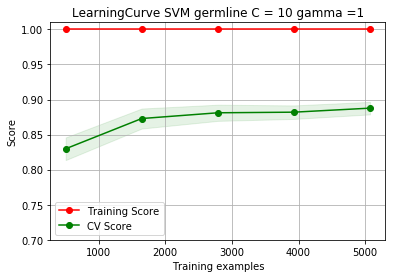

In [28]:
#generates learning curves based on vector and esetimator fed. So get the best estimator parameters, declare an estimator
#here and pass the required data into the plot_learning_curve function
from sklearn.model_selection import ShuffleSplit
title = "LearningCurve SVM germline C = 10 gamma =1" 
cv = ShuffleSplit(n_splits=10,test_size=0.2, random_state=0)
estimator = SVC(C=10,gamma=1)
plot_learning_curve(estimator,title,mess_tfidf,label2,ylim=(0.7,1.01),cv=cv,n_jobs=4)
plt.show()

# Getting all of this into a single function which predicts classes based on the trained models :